In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Datasetini %80 %20 ayırdım
import os
import shutil
from sklearn.model_selection import train_test_split

original_train_dataset = "/content/drive/MyDrive/Yazlab2Proje3/drivedataset/train"
train = "/content/drive/MyDrive/Yazlab2Proje3/dataset/train"
val = "/content/drive/MyDrive/Yazlab2Proje3/dataset/val"

os.makedirs(train, exist_ok=True)
os.makedirs(val, exist_ok=True)

zoo_classes = os.listdir(original_train_dataset)

for zoo_class_name in zoo_classes:
    zoo_class_path = os.path.join(original_train_dataset, zoo_class_name)
    images = os.listdir(zoo_class_path)

    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_images:
        src = os.path.join(zoo_class_path, img)
        dst_dir = os.path.join(train, zoo_class_name)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy2(src, dst_dir)

    for img in val_images:
        src = os.path.join(zoo_class_path, img)
        dst_dir = os.path.join(val, zoo_class_name)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy2(src, dst_dir)

print("✅ Veri seti %80 train / %20 validation olarak ayrıldı.")


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

def resize_with_detail_preservation(image_path):
    pil_image = Image.open(image_path).convert("RGB")
    img_rgb = np.array(pil_image)

    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    laplacian_color = cv2.merge([laplacian, laplacian, laplacian])

    image_resize = cv2.resize(img_bgr, (224, 224), interpolation=cv2.INTER_LANCZOS4)
    laplacian_resize = cv2.resize(laplacian_color, (224, 224), interpolation=cv2.INTER_LANCZOS4)

    laplacian_image = cv2.addWeighted(image_resize, 1.0, laplacian_resize, 0.1, 0)

    laplacian_image_rgb = cv2.cvtColor(laplacian_image, cv2.COLOR_BGR2RGB)
    return Image.fromarray(laplacian_image_rgb)

folder_train_val = [
    {
        "input_dir": "/content/drive/MyDrive/Yazlab2Proje3/dataset/train",
        "output_dir": "/content/drive/MyDrive/Yazlab2Proje3/resize/train_resized_detail"
    },
    {
        "input_dir": "/content/drive/MyDrive/Yazlab2Proje3/dataset/val",
        "output_dir": "/content/drive/MyDrive/Yazlab2Proje3/resize/val_resized_detail"
    }
]

for folder in folder_train_val:
    input_dir = folder["input_dir"]
    output_dir = folder["output_dir"]
    os.makedirs(output_dir, exist_ok=True)

    for class_name in os.listdir(input_dir):
        input_class_dir = os.path.join(input_dir, class_name)
        output_class_dir = os.path.join(output_dir, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        for image_name in tqdm(os.listdir(input_class_dir), desc=f"{class_name} ({os.path.basename(input_dir)})"):
            image_path = os.path.join(input_class_dir, image_name)
            output_path = os.path.join(output_class_dir, image_name)

            try:
                processed_img = resize_with_detail_preservation(image_path)
                processed_img.save(output_path)
            except Exception as e:
                print(f"❌ {image_name} işlenemedi: {e}")


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Cihaz: cuda


model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]


📚 Epoch 1/50


Epoch 1: 100%|██████████| 119/119 [02:50<00:00,  1.43s/it]


📊 Epoch 1: Train Loss=4.3318, Val Loss=4.0889, Train Acc=81.53%, Val Acc=91.72%, Precision=92.66%, Recall=91.72%, F1=91.25%
📂 En iyi model kaydedildi.

📚 Epoch 2/50


Epoch 2: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 2: Train Loss=3.8252, Val Loss=3.5457, Train Acc=86.93%, Val Acc=92.63%, Precision=94.15%, Recall=92.63%, F1=92.32%
📂 En iyi model kaydedildi.

📚 Epoch 3/50


Epoch 3: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 3: Train Loss=3.2988, Val Loss=3.0496, Train Acc=88.65%, Val Acc=91.52%, Precision=93.19%, Recall=91.52%, F1=91.26%
📂 En iyi model kaydedildi.

📚 Epoch 4/50


Epoch 4: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 4: Train Loss=2.8095, Val Loss=2.5918, Train Acc=91.16%, Val Acc=91.72%, Precision=92.48%, Recall=91.72%, F1=91.07%
📂 En iyi model kaydedildi.

📚 Epoch 5/50


Epoch 5: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 5: Train Loss=2.3639, Val Loss=2.1779, Train Acc=92.14%, Val Acc=92.22%, Precision=93.26%, Recall=92.22%, F1=91.84%
📂 En iyi model kaydedildi.

📚 Epoch 6/50


Epoch 6: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 6: Train Loss=1.9481, Val Loss=1.7987, Train Acc=93.54%, Val Acc=93.43%, Precision=94.57%, Recall=93.43%, F1=93.07%
📂 En iyi model kaydedildi.

📚 Epoch 7/50


Epoch 7: 100%|██████████| 119/119 [02:48<00:00,  1.41s/it]


📊 Epoch 7: Train Loss=1.5869, Val Loss=1.4673, Train Acc=95.00%, Val Acc=94.44%, Precision=94.99%, Recall=94.44%, F1=94.24%
📂 En iyi model kaydedildi.

📚 Epoch 8/50


Epoch 8: 100%|██████████| 119/119 [02:48<00:00,  1.41s/it]


📊 Epoch 8: Train Loss=1.2740, Val Loss=1.1934, Train Acc=96.24%, Val Acc=94.75%, Precision=95.37%, Recall=94.75%, F1=94.66%
📂 En iyi model kaydedildi.

📚 Epoch 9/50


Epoch 9: 100%|██████████| 119/119 [02:48<00:00,  1.41s/it]


📊 Epoch 9: Train Loss=1.0236, Val Loss=0.9804, Train Acc=96.93%, Val Acc=95.76%, Precision=96.22%, Recall=95.76%, F1=95.68%
📂 En iyi model kaydedildi.

📚 Epoch 10/50


Epoch 10: 100%|██████████| 119/119 [02:48<00:00,  1.41s/it]


📊 Epoch 10: Train Loss=0.8137, Val Loss=0.8078, Train Acc=98.20%, Val Acc=95.66%, Precision=96.23%, Recall=95.66%, F1=95.60%
📂 En iyi model kaydedildi.

📚 Epoch 11/50


Epoch 11: 100%|██████████| 119/119 [02:50<00:00,  1.43s/it]


📊 Epoch 11: Train Loss=0.6510, Val Loss=0.6717, Train Acc=98.94%, Val Acc=95.25%, Precision=95.77%, Recall=95.25%, F1=95.18%
📂 En iyi model kaydedildi.

📚 Epoch 12/50


Epoch 12: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 12: Train Loss=0.5224, Val Loss=0.5662, Train Acc=98.97%, Val Acc=95.96%, Precision=96.43%, Recall=95.96%, F1=95.94%
📂 En iyi model kaydedildi.

📚 Epoch 13/50


Epoch 13: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 13: Train Loss=0.4260, Val Loss=0.4842, Train Acc=99.18%, Val Acc=95.86%, Precision=96.21%, Recall=95.86%, F1=95.80%
📂 En iyi model kaydedildi.

📚 Epoch 14/50


Epoch 14: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 14: Train Loss=0.3510, Val Loss=0.4048, Train Acc=99.39%, Val Acc=95.96%, Precision=96.37%, Recall=95.96%, F1=95.93%
📂 En iyi model kaydedildi.

📚 Epoch 15/50


Epoch 15: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 15: Train Loss=0.2810, Val Loss=0.3567, Train Acc=99.76%, Val Acc=96.26%, Precision=96.60%, Recall=96.26%, F1=96.25%
📂 En iyi model kaydedildi.

📚 Epoch 16/50


Epoch 16: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 16: Train Loss=0.2301, Val Loss=0.3162, Train Acc=99.76%, Val Acc=96.46%, Precision=96.80%, Recall=96.46%, F1=96.44%
📂 En iyi model kaydedildi.

📚 Epoch 17/50


Epoch 17: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 17: Train Loss=0.1961, Val Loss=0.2800, Train Acc=99.66%, Val Acc=96.67%, Precision=96.96%, Recall=96.67%, F1=96.66%
📂 En iyi model kaydedildi.

📚 Epoch 18/50


Epoch 18: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 18: Train Loss=0.1651, Val Loss=0.2770, Train Acc=99.81%, Val Acc=95.96%, Precision=96.32%, Recall=95.96%, F1=95.94%
📂 En iyi model kaydedildi.

📚 Epoch 19/50


Epoch 19: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 19: Train Loss=0.1477, Val Loss=0.2368, Train Acc=99.71%, Val Acc=96.16%, Precision=96.56%, Recall=96.16%, F1=96.16%
📂 En iyi model kaydedildi.

📚 Epoch 20/50


Epoch 20: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 20: Train Loss=0.1301, Val Loss=0.2300, Train Acc=99.79%, Val Acc=96.26%, Precision=96.70%, Recall=96.26%, F1=96.25%
📂 En iyi model kaydedildi.

📚 Epoch 21/50


Epoch 21: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 21: Train Loss=0.1035, Val Loss=0.2061, Train Acc=99.87%, Val Acc=96.87%, Precision=97.22%, Recall=96.87%, F1=96.86%
📂 En iyi model kaydedildi.

📚 Epoch 22/50


Epoch 22: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 22: Train Loss=0.0932, Val Loss=0.1935, Train Acc=99.92%, Val Acc=96.77%, Precision=97.03%, Recall=96.77%, F1=96.75%
📂 En iyi model kaydedildi.

📚 Epoch 23/50


Epoch 23: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 23: Train Loss=0.0818, Val Loss=0.2095, Train Acc=99.87%, Val Acc=95.66%, Precision=96.16%, Recall=95.66%, F1=95.69%
⏳ Erken durdurma sayacı: 1/2

📚 Epoch 24/50


Epoch 24: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 24: Train Loss=0.0767, Val Loss=0.1806, Train Acc=99.81%, Val Acc=96.77%, Precision=97.16%, Recall=96.77%, F1=96.74%
📂 En iyi model kaydedildi.

📚 Epoch 25/50


Epoch 25: 100%|██████████| 119/119 [02:49<00:00,  1.42s/it]


📊 Epoch 25: Train Loss=0.0666, Val Loss=0.1619, Train Acc=99.89%, Val Acc=96.67%, Precision=97.10%, Recall=96.67%, F1=96.66%
📂 En iyi model kaydedildi.

📚 Epoch 26/50


Epoch 26: 100%|██████████| 119/119 [02:50<00:00,  1.43s/it]


📊 Epoch 26: Train Loss=0.0537, Val Loss=0.1671, Train Acc=99.97%, Val Acc=96.57%, Precision=96.95%, Recall=96.57%, F1=96.55%
⏳ Erken durdurma sayacı: 1/2

📚 Epoch 27/50


Epoch 27: 100%|██████████| 119/119 [02:48<00:00,  1.42s/it]


📊 Epoch 27: Train Loss=0.0510, Val Loss=0.1674, Train Acc=99.84%, Val Acc=96.36%, Precision=96.69%, Recall=96.36%, F1=96.35%
⏳ Erken durdurma sayacı: 2/2
🚑 Erken durdurma tetiklendi.


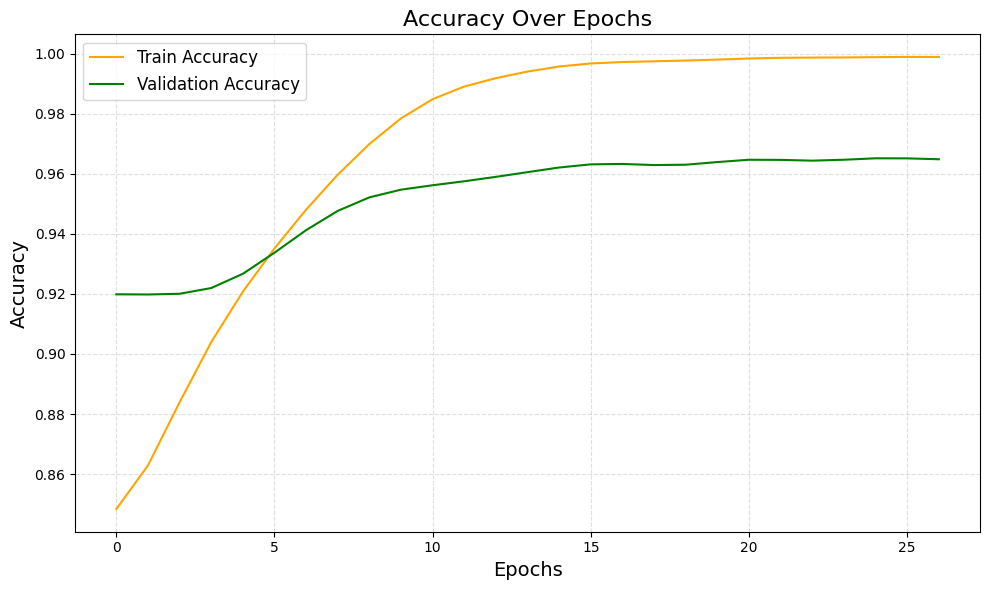

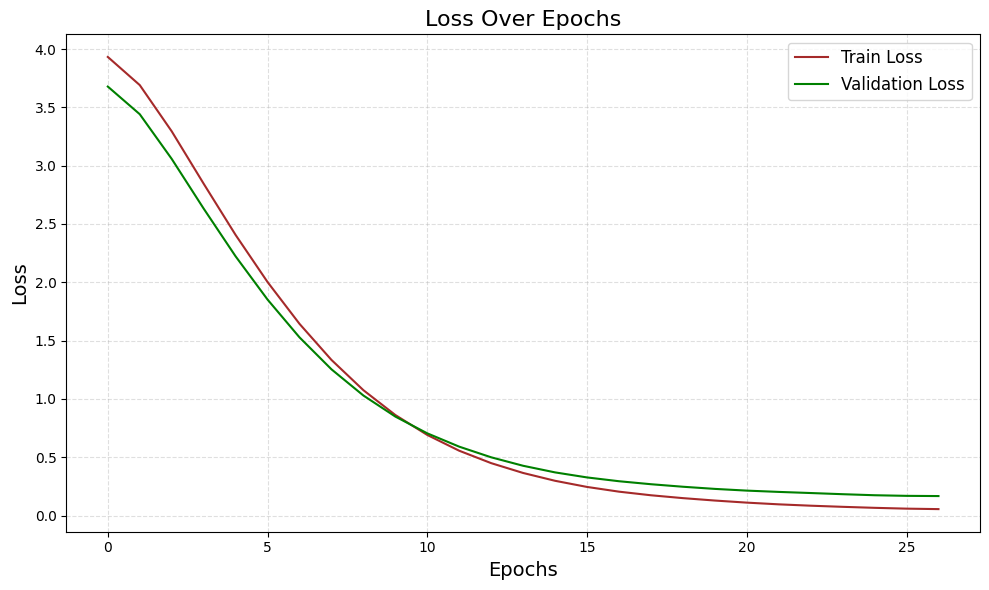

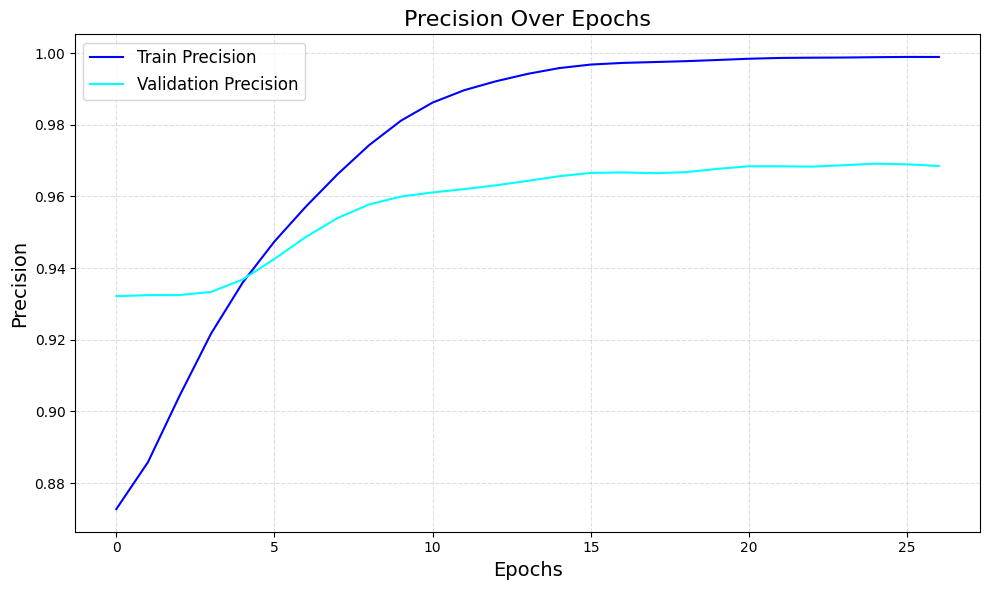

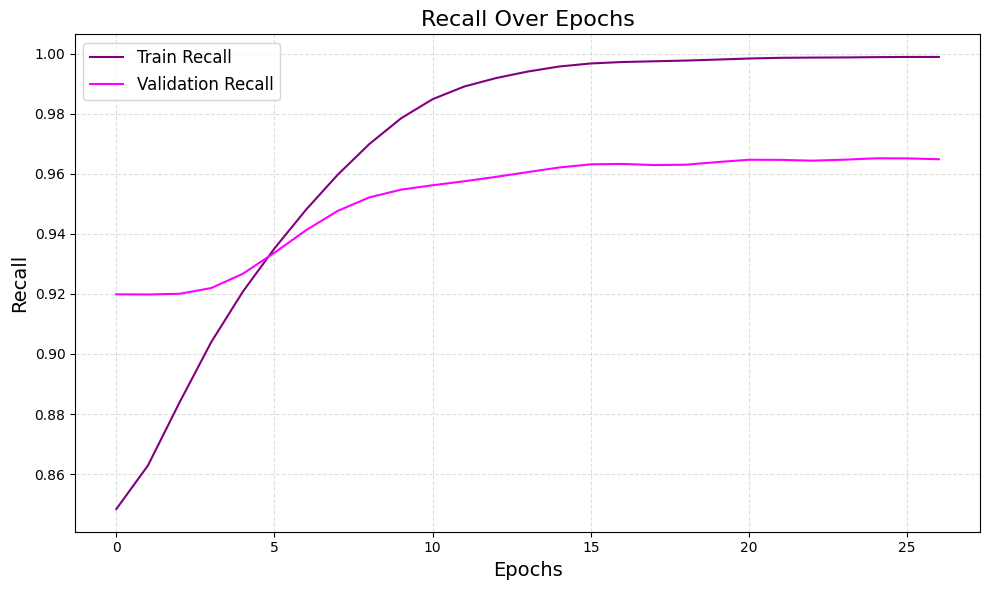

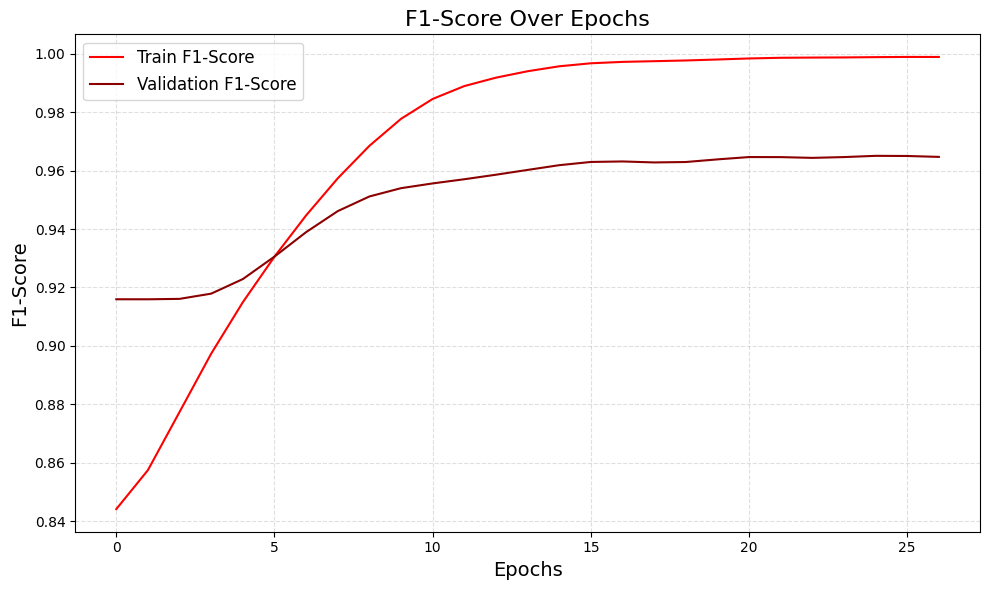

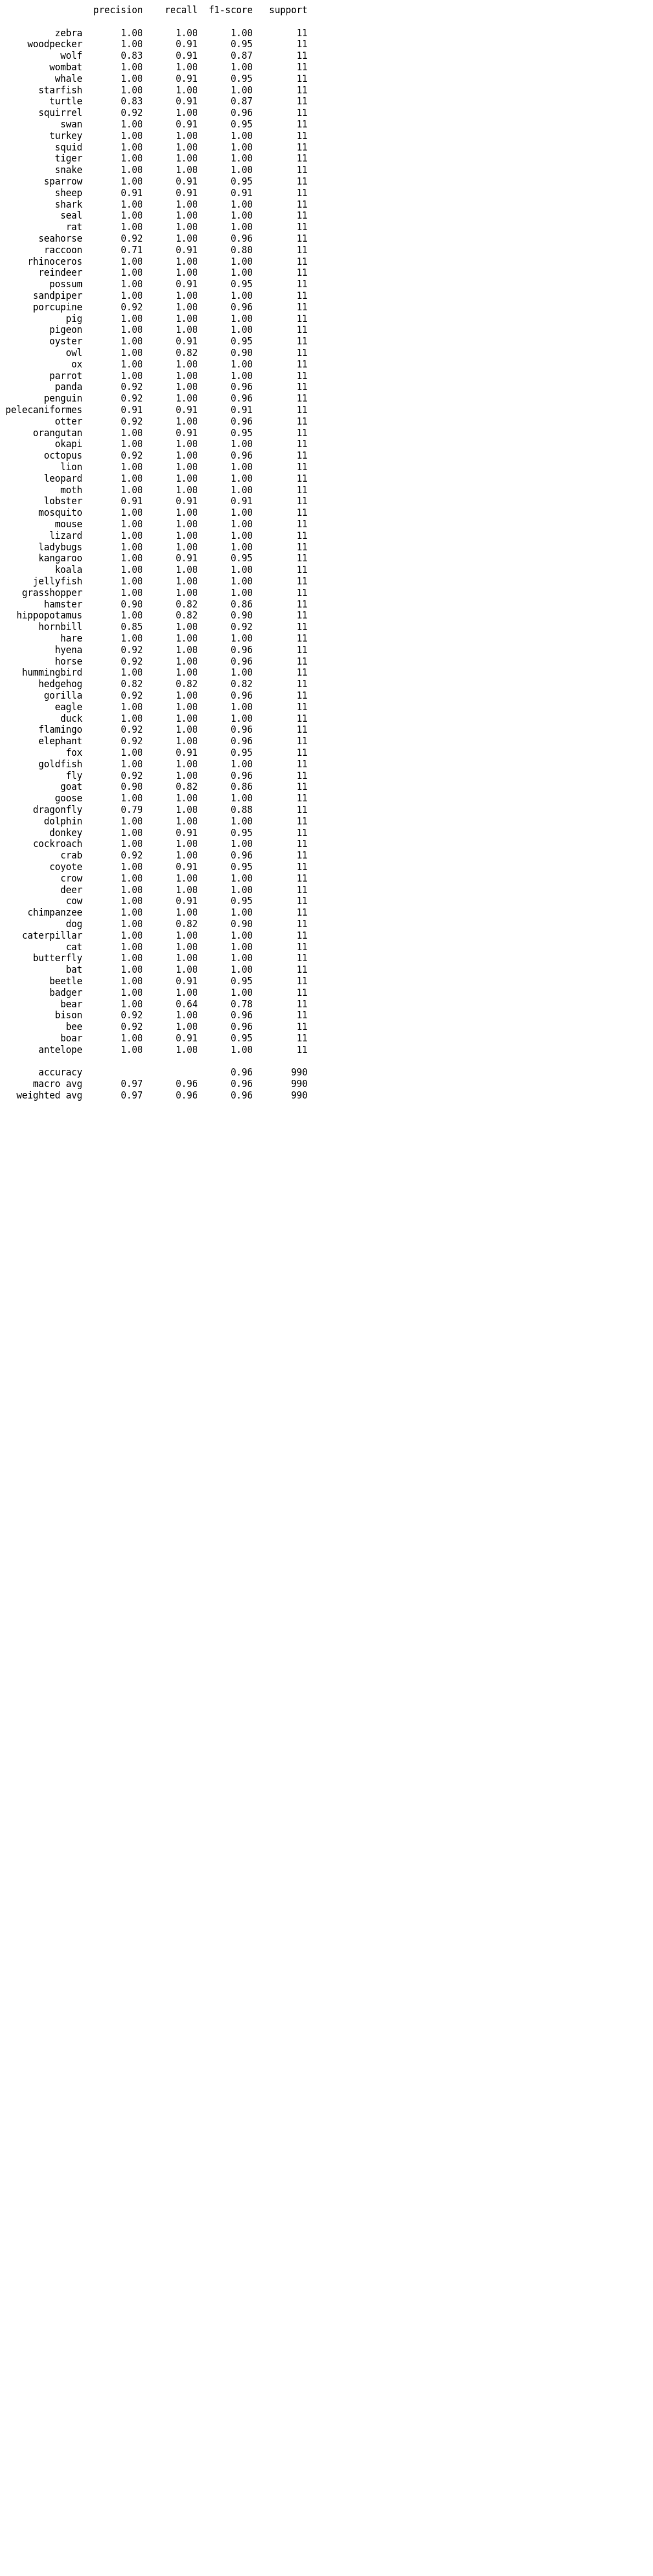


📊 Son Doğrulama Raporu:
                precision    recall  f1-score   support

         zebra       1.00      1.00      1.00        11
    woodpecker       1.00      0.91      0.95        11
          wolf       0.83      0.91      0.87        11
        wombat       1.00      1.00      1.00        11
         whale       1.00      0.91      0.95        11
      starfish       1.00      1.00      1.00        11
        turtle       0.83      0.91      0.87        11
      squirrel       0.92      1.00      0.96        11
          swan       1.00      0.91      0.95        11
        turkey       1.00      1.00      1.00        11
         squid       1.00      1.00      1.00        11
         tiger       1.00      1.00      1.00        11
         snake       1.00      1.00      1.00        11
       sparrow       1.00      0.91      0.95        11
         sheep       0.91      0.91      0.91        11
         shark       1.00      1.00      1.00        11
          seal       1

In [ ]:
#beitalbumentation denemesi
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from torch.utils.data import Dataset


class AlbumentationsDataset(Dataset):
    def __init__(self, image_folder_dataset, transform=None):
        self.image_folder_dataset = image_folder_dataset
        self.transform = transform

    def __getitem__(self, index):
        path, label = self.image_folder_dataset.samples[index]
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label

    def __len__(self):
        return len(self.image_folder_dataset)


def draw_metric(train_vals, val_vals, metric_name, filename, train_color, val_color, sigma=1.5):
    train = gaussian_filter1d(train_vals, sigma=sigma)
    val = gaussian_filter1d(val_vals, sigma=sigma)

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_vals)), train, label=f"Train {metric_name}", color=train_color, linewidth=1.5)
    plt.plot(range(len(val_vals)), val, label=f"Validation {metric_name}", color=val_color, linewidth=1.5)
    plt.title(f"{metric_name} Over Epochs", fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


def train_model(model_name="beit_base_patch16_224", save_path="best_beit.pth", fig_name="beit_plot.png", epochs=50, early_stop_patience=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Cihaz: {device}")

    data_dir = "/content/drive/MyDrive/Yazlab2Proje3/resize"
    class_names = os.listdir(os.path.join(data_dir, "train_resized_detail"))
    num_classes = len(class_names)

    # Albumentations kullanarak veri augmentasyonu yapıldı
    albumentations_transform = A.Compose([
        A.RandomResizedCrop(size=(224, 224), scale=(0.9, 1.0), p=1.0),
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=15, p=0.5),
        A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1, p=0.8),
        A.OneOf([
            A.MotionBlur(p=0.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.GaussianBlur(p=0.1),
        ], p=0.3),
        A.RandomShadow(p=0.3),
        A.RandomBrightnessContrast(p=0.3),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2()
    ])

    # Val dogrulama seti için sadece normalizasyon
    val_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])

    train_base_dataset = datasets.ImageFolder(os.path.join(data_dir, "train_resized_detail"))
    train_dataset = AlbumentationsDataset(train_base_dataset, transform=albumentations_transform)
    val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val_resized_detail"), transform=val_transforms)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
    model.to(device)

    loss_fonk = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-5)

    train_accuracies, val_accuracies = [], []
    train_losses, val_losses = [], []
    train_precisions, val_precisions = [], []
    train_recalls, val_recalls = [], []
    train_f1_scores, val_f1_scores = [], []

    best_val_loss = float('inf')
    stop_counter = 0

    for epoch in range(epochs):
        print(f"\n📚 Epoch {epoch+1}/{epochs}")
        model.train()
        running_loss = 0.0
        correct_train, total_train = 0, 0
        all_train_preds, all_train_labels = [], []

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fonk(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)
            all_train_preds.extend(preds.cpu().numpy())
            all_train_labels.extend(labels.cpu().numpy())

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_precision = precision_score(all_train_labels, all_train_preds, average="macro", zero_division=0)
        train_recall = recall_score(all_train_labels, all_train_preds, average="macro", zero_division=0)
        train_f1 = f1_score(all_train_labels, all_train_preds, average="macro", zero_division=0)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        train_f1_scores.append(train_f1)

        model.eval()
        val_running_loss = 0.0
        all_preds, all_labels = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_fonk(outputs, labels)
                val_running_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_loss = val_running_loss / len(val_loader)
        val_accuracy = accuracy_score(all_labels, all_preds)
        val_precision = precision_score(all_labels, all_preds, average="macro", zero_division=0)
        val_recall = recall_score(all_labels, all_preds, average="macro", zero_division=0)
        val_f1 = f1_score(all_labels, all_preds, average="macro", zero_division=0)

        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_precisions.append(val_precision)
        val_recalls.append(val_recall)
        val_f1_scores.append(val_f1)

        print(f"📊 Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, "
              f"Train Acc={train_accuracy*100:.2f}%, Val Acc={val_accuracy*100:.2f}%, "
              f"Precision={val_precision*100:.2f}%, Recall={val_recall*100:.2f}%, F1={val_f1*100:.2f}%")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            stop_counter = 0
            torch.save(model.state_dict(), save_path)
            print("📂 En iyi model kaydedildi.")
        else:
            stop_counter += 1
            print(f"⏳ Erken durdurma sayacı: {stop_counter}/{early_stop_patience}")
            if stop_counter >= early_stop_patience:
                print("🚑 Erken durdurma tetiklendi.")
                break

    draw_metric(train_accuracies, val_accuracies, "Accuracy", "accuracy_plot.png", "orange", "green")
    draw_metric(train_losses, val_losses, "Loss", "loss_plot.png", "brown", "green")
    draw_metric(train_precisions, val_precisions, "Precision", "precision_plot.png", "blue", "cyan")
    draw_metric(train_recalls, val_recalls, "Recall", "recall_plot.png", "purple", "magenta")
    draw_metric(train_f1_scores, val_f1_scores, "F1-Score", "f1_plot.png", "red", "darkred")

    report_string = classification_report(all_labels, all_preds, target_names=class_names)
    fig, ax = plt.subplots(figsize=(12, len(class_names) * 0.5 + 2))
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.text(0, 1, report_string, fontsize=12, fontfamily='monospace', verticalalignment='top')
    report_filename = "val_report_" + fig_name.replace(".png", "") + ".png"
    plt.tight_layout()
    plt.savefig(report_filename, bbox_inches='tight')
    plt.show()

    print("\n📊 Son Doğrulama Raporu:")
    print(report_string)

train_model()


In [3]:
import torch
import timm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

MODEL_PATH = "/content/drive/MyDrive/beitsondenemealb/best_beit.pth"
TEST_DIR = "/content/drive/MyDrive/testval/val"
CLASS_COUNT = 90
BATCH_SIZE = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = timm.create_model("beit_base_patch16_224", pretrained=False, num_classes=CLASS_COUNT)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_dataset = datasets.ImageFolder(TEST_DIR, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

class_names = test_dataset.classes
report = classification_report(all_labels, all_preds, target_names=class_names, digits=4)

print("Classification Report:\n")
print(report)
print(f"\nMetrics:\n"
      f"Accuracy : {accuracy:.4f}\n"
      f"Precision: {precision:.4f}\n"
      f"Recall   : {recall:.4f}\n"
      f"F1-Score : {f1:.4f}")

report_path = "/content/drive/MyDrive/beitsondenemealb/classification_report2.txt"
with open(report_path, "w") as f:
    f.write("Classification Report:\n\n")
    f.write(report)
    f.write("\n Metrics:\n")
    f.write(f"Accuracy : {accuracy:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall   : {recall:.4f}\n")
    f.write(f"F1-Score : {f1:.4f}\n")


Classification Report:

                precision    recall  f1-score   support

      antelope     1.0000    1.0000    1.0000         7
        badger     1.0000    1.0000    1.0000         7
           bat     1.0000    1.0000    1.0000         7
          bear     1.0000    0.7143    0.8333         7
           bee     1.0000    1.0000    1.0000         7
        beetle     1.0000    0.8571    0.9231         7
         bison     1.0000    1.0000    1.0000         7
          boar     1.0000    0.8571    0.9231         7
     butterfly     1.0000    1.0000    1.0000         7
           cat     1.0000    1.0000    1.0000         7
   caterpillar     1.0000    1.0000    1.0000         7
    chimpanzee     1.0000    1.0000    1.0000         7
     cockroach     1.0000    1.0000    1.0000         7
           cow     0.8750    1.0000    0.9333         7
        coyote     0.8750    1.0000    0.9333         7
          crab     1.0000    1.0000    1.0000         7
          crow     0.87

Cihaz: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]


📚 Epoch 1/50


Epoch 1: 100%|██████████| 119/119 [31:42<00:00, 15.99s/it]


📊 Epoch 1: Train Loss=4.3229, Val Loss=4.0752, Train Acc=85.26%, Val Acc=91.31%, Precision=93.08%, Recall=91.31%, F1=90.65%
📂 En iyi model kaydedildi.

📚 Epoch 2/50


Epoch 2: 100%|██████████| 119/119 [02:41<00:00,  1.36s/it]


📊 Epoch 2: Train Loss=3.7892, Val Loss=3.5099, Train Acc=89.29%, Val Acc=90.71%, Precision=90.50%, Recall=90.71%, F1=89.51%
📂 En iyi model kaydedildi.

📚 Epoch 3/50


Epoch 3: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 3: Train Loss=3.2174, Val Loss=2.9835, Train Acc=89.29%, Val Acc=90.51%, Precision=92.26%, Recall=90.51%, F1=89.35%
📂 En iyi model kaydedildi.

📚 Epoch 4/50


Epoch 4: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 4: Train Loss=2.6910, Val Loss=2.5038, Train Acc=91.64%, Val Acc=91.01%, Precision=91.25%, Recall=91.01%, F1=89.76%
📂 En iyi model kaydedildi.

📚 Epoch 5/50


Epoch 5: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 5: Train Loss=2.2059, Val Loss=2.0741, Train Acc=92.49%, Val Acc=91.11%, Precision=91.58%, Recall=91.11%, F1=90.06%
📂 En iyi model kaydedildi.

📚 Epoch 6/50


Epoch 6: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 6: Train Loss=1.7657, Val Loss=1.6892, Train Acc=93.39%, Val Acc=91.82%, Precision=92.63%, Recall=91.82%, F1=91.00%
📂 En iyi model kaydedildi.

📚 Epoch 7/50


Epoch 7: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 7: Train Loss=1.3860, Val Loss=1.3573, Train Acc=95.34%, Val Acc=93.03%, Precision=93.57%, Recall=93.03%, F1=92.29%
📂 En iyi model kaydedildi.

📚 Epoch 8/50


Epoch 8: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 8: Train Loss=1.0733, Val Loss=1.0948, Train Acc=97.62%, Val Acc=94.65%, Precision=95.28%, Recall=94.65%, F1=94.54%
📂 En iyi model kaydedildi.

📚 Epoch 9/50


Epoch 9: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 9: Train Loss=0.8273, Val Loss=0.8893, Train Acc=99.29%, Val Acc=95.86%, Precision=96.26%, Recall=95.86%, F1=95.82%
📂 En iyi model kaydedildi.

📚 Epoch 10/50


Epoch 10: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 10: Train Loss=0.6373, Val Loss=0.7416, Train Acc=99.79%, Val Acc=95.35%, Precision=95.76%, Recall=95.35%, F1=95.28%
📂 En iyi model kaydedildi.

📚 Epoch 11/50


Epoch 11: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 11: Train Loss=0.4915, Val Loss=0.6151, Train Acc=99.81%, Val Acc=95.66%, Precision=96.08%, Recall=95.66%, F1=95.61%
📂 En iyi model kaydedildi.

📚 Epoch 12/50


Epoch 12: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 12: Train Loss=0.3800, Val Loss=0.5322, Train Acc=100.00%, Val Acc=95.05%, Precision=95.50%, Recall=95.05%, F1=94.98%
📂 En iyi model kaydedildi.

📚 Epoch 13/50


Epoch 13: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 13: Train Loss=0.2971, Val Loss=0.4550, Train Acc=100.00%, Val Acc=95.56%, Precision=95.88%, Recall=95.56%, F1=95.47%
📂 En iyi model kaydedildi.

📚 Epoch 14/50


Epoch 14: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 14: Train Loss=0.2358, Val Loss=0.4131, Train Acc=99.97%, Val Acc=95.25%, Precision=95.68%, Recall=95.25%, F1=95.16%
📂 En iyi model kaydedildi.

📚 Epoch 15/50


Epoch 15: 100%|██████████| 119/119 [02:41<00:00,  1.35s/it]


📊 Epoch 15: Train Loss=0.1912, Val Loss=0.3664, Train Acc=99.97%, Val Acc=95.15%, Precision=95.65%, Recall=95.15%, F1=95.11%
📂 En iyi model kaydedildi.

📚 Epoch 16/50


Epoch 16: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 16: Train Loss=0.1549, Val Loss=0.3301, Train Acc=100.00%, Val Acc=95.76%, Precision=96.18%, Recall=95.76%, F1=95.71%
📂 En iyi model kaydedildi.

📚 Epoch 17/50


Epoch 17: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 17: Train Loss=0.1287, Val Loss=0.3106, Train Acc=100.00%, Val Acc=95.86%, Precision=96.33%, Recall=95.86%, F1=95.84%
📂 En iyi model kaydedildi.

📚 Epoch 18/50


Epoch 18: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 18: Train Loss=0.1077, Val Loss=0.2944, Train Acc=99.97%, Val Acc=95.25%, Precision=95.78%, Recall=95.25%, F1=95.22%
📂 En iyi model kaydedildi.

📚 Epoch 19/50


Epoch 19: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 19: Train Loss=0.0913, Val Loss=0.2771, Train Acc=100.00%, Val Acc=95.45%, Precision=95.98%, Recall=95.45%, F1=95.42%
📂 En iyi model kaydedildi.

📚 Epoch 20/50


Epoch 20: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 20: Train Loss=0.0783, Val Loss=0.2720, Train Acc=100.00%, Val Acc=95.05%, Precision=95.59%, Recall=95.05%, F1=95.02%
📂 En iyi model kaydedildi.

📚 Epoch 21/50


Epoch 21: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 21: Train Loss=0.0679, Val Loss=0.2561, Train Acc=100.00%, Val Acc=95.35%, Precision=95.81%, Recall=95.35%, F1=95.32%
📂 En iyi model kaydedildi.

📚 Epoch 22/50


Epoch 22: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 22: Train Loss=0.0594, Val Loss=0.2493, Train Acc=100.00%, Val Acc=95.35%, Precision=95.86%, Recall=95.35%, F1=95.34%
📂 En iyi model kaydedildi.

📚 Epoch 23/50


Epoch 23: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 23: Train Loss=0.0521, Val Loss=0.2455, Train Acc=100.00%, Val Acc=94.75%, Precision=95.33%, Recall=94.75%, F1=94.71%
📂 En iyi model kaydedildi.

📚 Epoch 24/50


Epoch 24: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 24: Train Loss=0.0462, Val Loss=0.2398, Train Acc=100.00%, Val Acc=95.05%, Precision=95.53%, Recall=95.05%, F1=95.01%
📂 En iyi model kaydedildi.

📚 Epoch 25/50


Epoch 25: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 25: Train Loss=0.0412, Val Loss=0.2316, Train Acc=100.00%, Val Acc=95.35%, Precision=95.83%, Recall=95.35%, F1=95.32%
📂 En iyi model kaydedildi.

📚 Epoch 26/50


Epoch 26: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 26: Train Loss=0.0368, Val Loss=0.2316, Train Acc=100.00%, Val Acc=94.85%, Precision=95.37%, Recall=94.85%, F1=94.83%
📂 En iyi model kaydedildi.

📚 Epoch 27/50


Epoch 27: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 27: Train Loss=0.0331, Val Loss=0.2280, Train Acc=100.00%, Val Acc=95.05%, Precision=95.60%, Recall=95.05%, F1=95.00%
📂 En iyi model kaydedildi.

📚 Epoch 28/50


Epoch 28: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 28: Train Loss=0.0298, Val Loss=0.2226, Train Acc=100.00%, Val Acc=94.85%, Precision=95.42%, Recall=94.85%, F1=94.80%
📂 En iyi model kaydedildi.

📚 Epoch 29/50


Epoch 29: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 29: Train Loss=0.0270, Val Loss=0.2209, Train Acc=100.00%, Val Acc=94.55%, Precision=95.03%, Recall=94.55%, F1=94.50%
📂 En iyi model kaydedildi.

📚 Epoch 30/50


Epoch 30: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 30: Train Loss=0.0245, Val Loss=0.2206, Train Acc=100.00%, Val Acc=94.95%, Precision=95.50%, Recall=94.95%, F1=94.91%
📂 En iyi model kaydedildi.

📚 Epoch 31/50


Epoch 31: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 31: Train Loss=0.0223, Val Loss=0.2172, Train Acc=100.00%, Val Acc=94.95%, Precision=95.48%, Recall=94.95%, F1=94.90%
📂 En iyi model kaydedildi.

📚 Epoch 32/50


Epoch 32: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 32: Train Loss=0.0203, Val Loss=0.2178, Train Acc=100.00%, Val Acc=94.95%, Precision=95.41%, Recall=94.95%, F1=94.90%
⏳ Erken durdurma sayacı: 1/2

📚 Epoch 33/50


Epoch 33: 100%|██████████| 119/119 [02:39<00:00,  1.34s/it]


📊 Epoch 33: Train Loss=0.0186, Val Loss=0.2159, Train Acc=100.00%, Val Acc=94.85%, Precision=95.39%, Recall=94.85%, F1=94.81%
📂 En iyi model kaydedildi.

📚 Epoch 34/50


Epoch 34: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 34: Train Loss=0.0170, Val Loss=0.2123, Train Acc=100.00%, Val Acc=95.05%, Precision=95.56%, Recall=95.05%, F1=95.02%
📂 En iyi model kaydedildi.

📚 Epoch 35/50


Epoch 35: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 35: Train Loss=0.0156, Val Loss=0.2178, Train Acc=100.00%, Val Acc=94.24%, Precision=94.83%, Recall=94.24%, F1=94.23%
⏳ Erken durdurma sayacı: 1/2

📚 Epoch 36/50


Epoch 36: 100%|██████████| 119/119 [02:40<00:00,  1.35s/it]


📊 Epoch 36: Train Loss=0.0143, Val Loss=0.2155, Train Acc=100.00%, Val Acc=94.44%, Precision=95.01%, Recall=94.44%, F1=94.40%
⏳ Erken durdurma sayacı: 2/2
🚑 Erken durdurma tetiklendi.


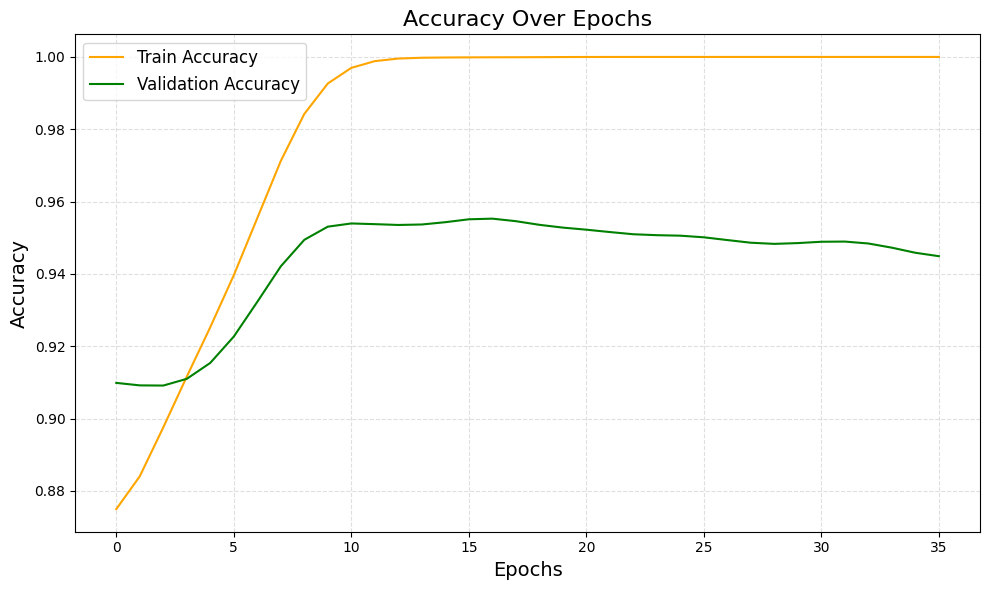

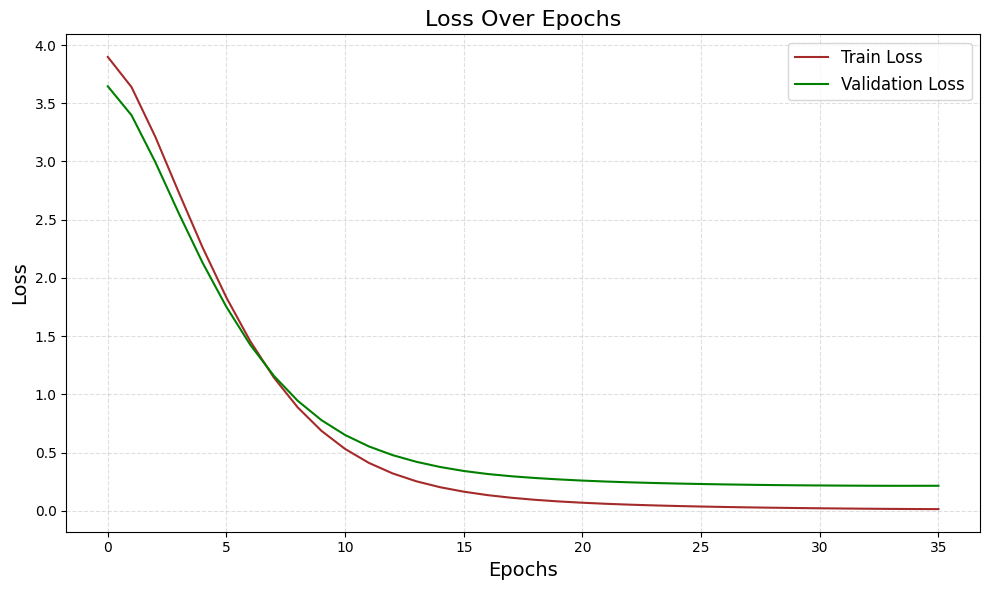

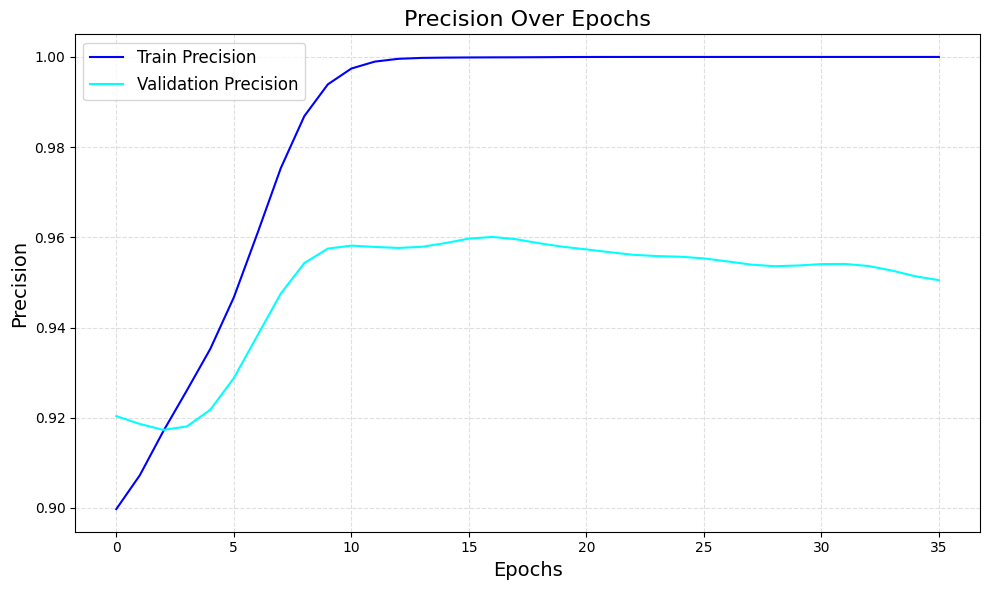

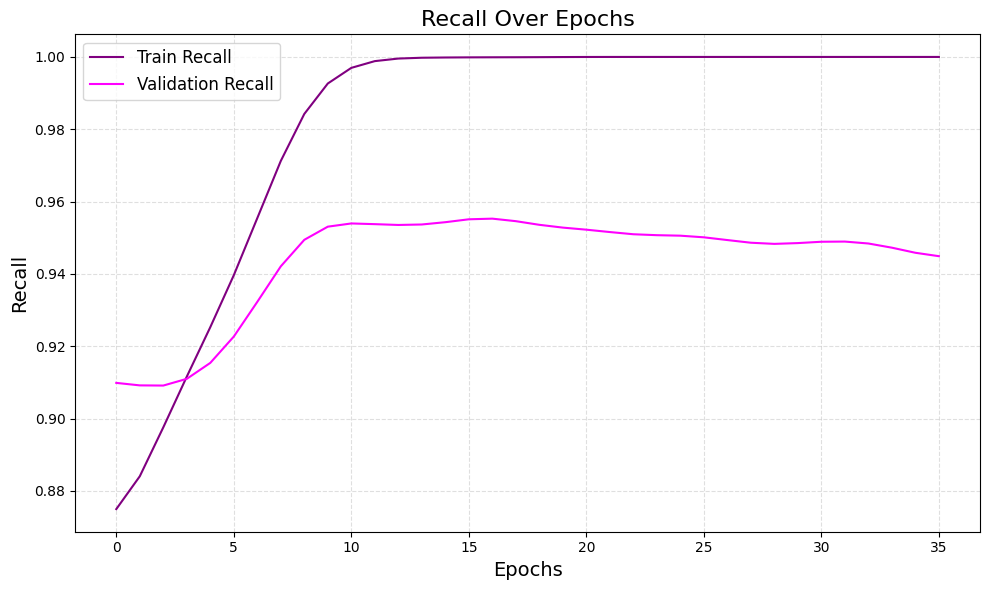

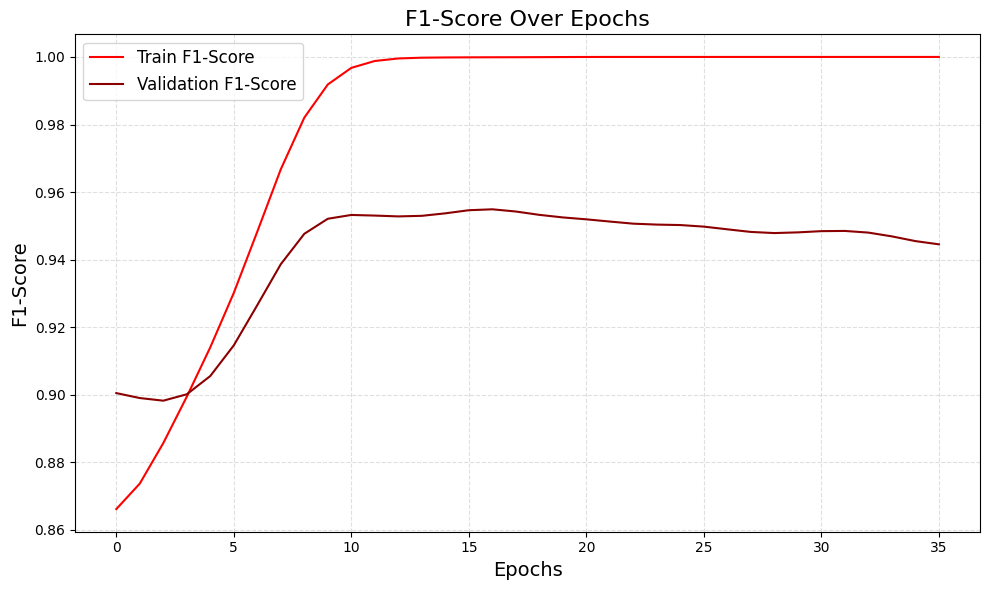

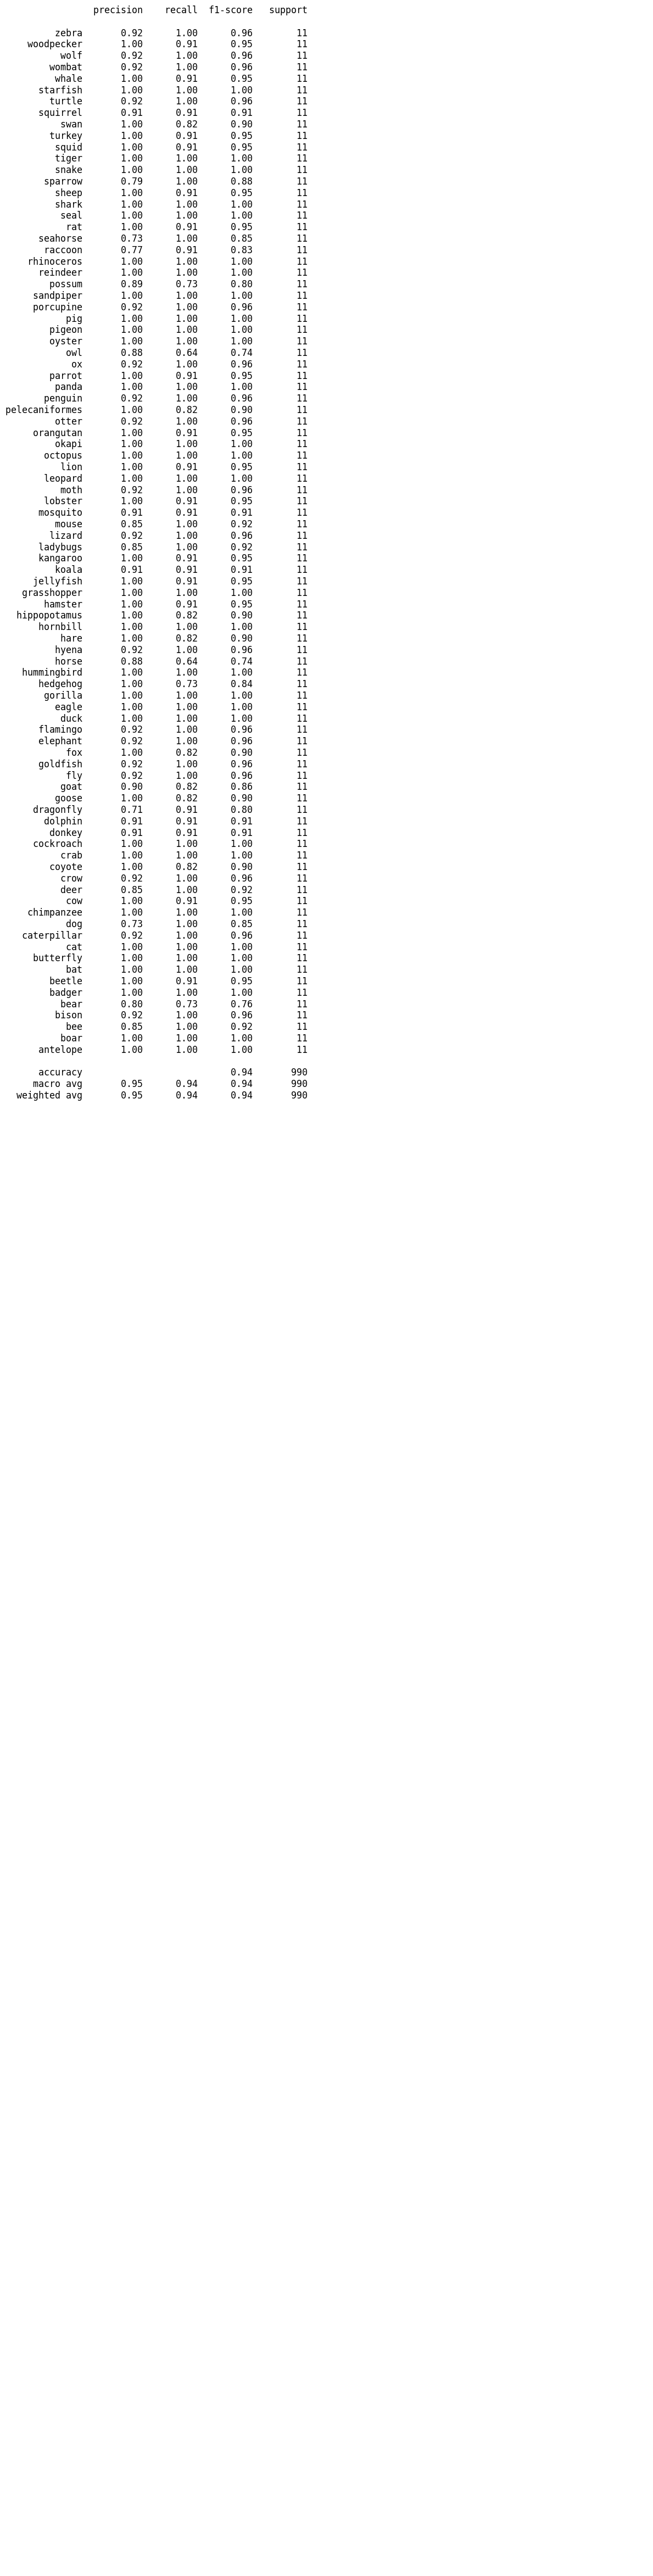


📊 Son Doğrulama Raporu:
                precision    recall  f1-score   support

         zebra       0.92      1.00      0.96        11
    woodpecker       1.00      0.91      0.95        11
          wolf       0.92      1.00      0.96        11
        wombat       0.92      1.00      0.96        11
         whale       1.00      0.91      0.95        11
      starfish       1.00      1.00      1.00        11
        turtle       0.92      1.00      0.96        11
      squirrel       0.91      0.91      0.91        11
          swan       1.00      0.82      0.90        11
        turkey       1.00      0.91      0.95        11
         squid       1.00      0.91      0.95        11
         tiger       1.00      1.00      1.00        11
         snake       1.00      1.00      1.00        11
       sparrow       0.79      1.00      0.88        11
         sheep       1.00      0.91      0.95        11
         shark       1.00      1.00      1.00        11
          seal       1

In [ ]:
# trans ile deneme bu kodla vit beit deit swin model denemeleri yapılarak karsılastırma yapıldı
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

def draw_metric(train_values, val_values, metric_name, filename, train_color, val_color):
    plt.figure(figsize=(10, 6))
    plt.plot(train_values, label=f"Train {metric_name}", color=train_color, linewidth=2.5)
    plt.plot(val_values, label=f"Validation {metric_name}", color=val_color, linewidth=2.5)
    plt.title(f"{metric_name} Over Epochs", fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def draw_metric_smoothed(train_values, val_values, metric_name, filename, train_color, val_color, sigma=1.5):
    train = gaussian_filter1d(train_values, sigma=sigma)
    val = gaussian_filter1d(val_values, sigma=sigma)

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_values)), train, label=f"Train {metric_name}", color=train_color, linewidth=1.5)
    plt.plot(range(len(val_values)), val, label=f"Validation {metric_name}", color=val_color, linewidth=1.5)
    plt.title(f"{metric_name} Over Epochs", fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def train_transformer_model(model_name="beit_base_patch16_224", save_path="best_beit.pth", fig_name="beit_plot.png", epochs=50, early_stop_patience=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Cihaz: {device}")

    data_dir = "/content/drive/MyDrive/Yazlab2Proje3/resize"
    class_names = os.listdir(os.path.join(data_dir, "train_resized_detail"))
    num_classes = len(class_names)
    # transforms ile ön işlem
    train_transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])
    val_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])

    train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train_resized_detail"), transform=train_transforms)
    val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val_resized_detail"), transform=val_transforms)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
    model.to(device)

    loss_fonk = nn.CrossEntropyLoss()
    optimize = optim.AdamW(model.parameters(), lr=1e-5)

    train_accuracies, val_accuracies = [], []
    train_losses, val_losses = [], []
    train_precisions, val_precisions = [], []
    train_recalls, val_recalls = [], []
    train_f1_scores, val_f1_scores = [], []

    best_val_loss = float('inf')
    stop_counter = 0

    for epoch in range(epochs):
        print(f"\n📚 Epoch {epoch+1}/{epochs}")
        model.train()
        running_loss = 0.0
        correct_train_tahmini, total_train = 0, 0
        all_train_tahmin, all_train_labels = [], []

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            images, labels = images.to(device), labels.to(device)
            optimize.zero_grad()
            outputs = model(images)
            loss = loss_fonk(outputs, labels)
            loss.backward()
            optimize.step()

            running_loss += loss.item()
            tahminler = torch.argmax(outputs, dim=1)
            correct_train_tahmini += (tahminler == labels).sum().item()
            total_train += labels.size(0)
            all_train_tahmin.extend(tahminler.cpu().numpy())
            all_train_labels.extend(labels.cpu().numpy())

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train_tahmini / total_train
        train_precision = precision_score(all_train_labels, all_train_tahmin, average="macro", zero_division=0)
        train_recall = recall_score(all_train_labels, all_train_tahmin, average="macro", zero_division=0)
        train_f1 = f1_score(all_train_labels, all_train_tahmin, average="macro", zero_division=0)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        train_f1_scores.append(train_f1)

        #dogrulama
        model.eval()
        val_running_loss = 0.0
        all_tahmin, all_labels = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_fonk(outputs, labels)
                val_running_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                all_tahmin.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_loss = val_running_loss / len(val_loader)
        val_accuracy = accuracy_score(all_labels, all_tahmin)
        val_precision = precision_score(all_labels, all_tahmin, average="macro", zero_division=0)
        val_recall = recall_score(all_labels, all_tahmin, average="macro", zero_division=0)
        val_f1 = f1_score(all_labels, all_tahmin, average="macro", zero_division=0)

        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_precisions.append(val_precision)
        val_recalls.append(val_recall)
        val_f1_scores.append(val_f1)

        print(f"📊 Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, "
              f"Train Acc={train_accuracy*100:.2f}%, Val Acc={val_accuracy*100:.2f}%, "
              f"Precision={val_precision*100:.2f}%, Recall={val_recall*100:.2f}%, F1={val_f1*100:.2f}%")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            stop_counter = 0
            torch.save(model.state_dict(), save_path)
            print("📂 En iyi model kaydedildi.")
        else:
            stop_counter += 1
            print(f"⏳ Erken durdurma sayacı: {stop_counter}/{early_stop_patience}")
            if stop_counter >= early_stop_patience:
                print("🚑 Erken durdurma tetiklendi.")
                break

    draw_metric_smoothed(train_accuracies, val_accuracies, "Accuracy", "accuracy_plot.png", "orange", "green")
    draw_metric_smoothed(train_losses, val_losses, "Loss", "loss_plot.png", "brown", "green")
    draw_metric_smoothed(train_precisions, val_precisions, "Precision", "precision_plot.png", "blue", "cyan")
    draw_metric_smoothed(train_recalls, val_recalls, "Recall", "recall_plot.png", "purple", "magenta")
    draw_metric_smoothed(train_f1_scores, val_f1_scores, "F1-Score", "f1_plot.png", "red", "darkred")

    report_string = classification_report(all_labels, all_tahmin, target_names=class_names)
    fig, ax = plt.subplots(figsize=(12, len(class_names) * 0.5 + 2))
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.text(0, 1, report_string, fontsize=12, fontfamily='monospace', verticalalignment='top')
    report_filename = "val_report_" + fig_name.replace(".png", "") + ".png"
    plt.tight_layout()
    plt.savefig(report_filename, bbox_inches='tight')
    plt.show()

    print("\n📊 Son Doğrulama Raporu:")
    print(report_string)

train_transformer_model()

#train_transformer_model(model_name="vit_base_patch16_224", save_path="vit_model.pth", fig_name="vit.png")
#train_transformer_model(model_name="beit_base_patch16_224", save_path="beit_model.pth", fig_name="beit.png")
#train_transformer_model(model_name="deit_base_patch16_224", save_path="deit_model.pth", fig_name="deit.png")
#train_transformer_model(model_name="swin_base_patch4_window7_224", save_path="swin_model.pth", fig_name="swin.png")
